<a class="anchor" id="home"></a>


<h1 style="color:white; background-color:black; text-align:center; border: 3px solid #C4C4C3" id=title>Titanic Death Predictions</h1>

### Table of Contents
* [Section 1: Importing Libraries and Data](#section1)
    * [Video: R.M.S. Titanic](#video)
* [Section 2: Previewing the Data](#section2)
* [Section 3: Data Cleaning](#section3)
    * [Section 3.1: Understanding the Clean Data](#99)
* [Section 4: Logistic Regression](#section4)
* [Section 5: K-Nearest Neighbor](#section5)

<a class="anchor" id="section1"></a>

<h2 style="color:white; background-color:black; text-align:center; border: 3px solid #C4C4C3">Importing Libraries and Data</h2>

In [1]:
test_data = "/Users/lgm/DS_Projects/Titanic/Data/test.csv"
train_data = "/Users/lgm/DS_Projects/Titanic/Data/train.csv"
gender_data = "/Users/lgm/DS_Projects/Titanic/Data/gender_submission.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from IPython.display import YouTubeVideo

<a class="anchor" id="video"></a>

<h3 style="color:white; background-color:#777777; text-align:center;" id=cleaning1>Intro: R.M.S. Titanic</h3>

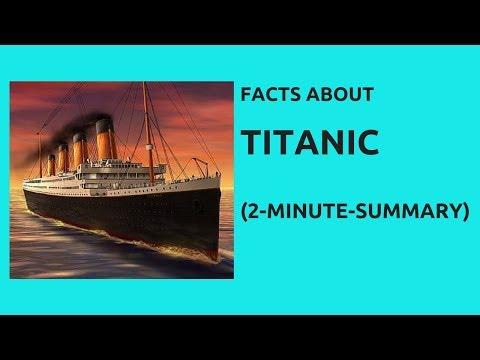

In [3]:
video = YouTubeVideo("pyLGpq--WNc")
display(video)

<a class="anchor" id="section2"></a>

<h2 style="color:white; background-color:black; text-align:center; border: 3px solid #C4C4C3">Previewing the Data
</h2>

In [4]:
train_df = pd.read_csv(train_data)

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df = pd.read_csv(test_data)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<a class="anchor" id="section3"></a>

<h2 style="color:white; background-color:black; text-align:center; border: 3px solid #C4C4C3">Data Cleaning
</h2>

<a class="anchor" id="intro"></a>

<h3 style="color:white; background-color:#777777; text-align:center;" id=cleaning1>Creating a Column for Formal Titles</h3>

In [8]:
people = []
title = []

for person in train_df['Name']:
    person = person.replace(',', '')
    person = person.replace('.', '')
    person = person.split(' ')
    people.append(person)
    
all_titles = {}
for person in people:
    for title in person:
        all_titles[title] = 0

for person in people:
    for title in person:
        all_titles[title] += 1

title = []
quantity = []
for name, occurrence in all_titles.items():
    title.append(name)
    quantity.append(occurrence)
    
data = {'Title': title,
        'Quantity': quantity
}
title_df = pd.DataFrame(data)
title_df = title_df.sort_values(by=['Quantity'], ascending=False)
title_df.head()

,Title,Quantity
1,Mr,517
12,Miss,182
5,Mrs,125
21,William,62
6,John,44


In [9]:
formal_titles = ['mr', 'miss', 'mrs', 'master', 'dr']
titles_dict = {'mr': 1,
               'miss': 2,
               'mrs': 3,
               'master': 4,
               'dr': 5,
               'null': 0}
title_column = []

def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

for person in train_df['Name']:
    person = person.replace(',', '')
    person = person.replace('.', '')
    person = person.split(' ')
    person = [val.lower() for val in person]
    if len(intersection(formal_titles, person)) == 1:
        title_column.append(titles_dict[intersection(formal_titles, person)[0].lower()])
    else:
        title_column.append(0)

            
len(train_df['Name']), len(title_column)

(891, 891)

In [10]:
train_df.insert(3, 'Title', title_column)
train_df.head()

,PassengerId,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,2,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
for key, val in titles_dict.items():
    print(val, ":", len(train_df.loc[train_df['Title'] == val]))

1 : 517
2 : 182
3 : 125
4 : 40
5 : 7
0 : 20


Ensuring the title column has been correctly created by checking that the length of the total counted titles is equal to the number of rows in the dataframe. 

In [12]:
sum1 = 517 + 182 + 125 + 40 + 7 + 20
len(train_df) == sum1

True

<a class="anchor" id="intro"></a>

<h3 style="color:white; background-color:#777777; text-align:center;" id=cleaning1>Dropping Name Column</h3>

In [13]:
train_df.drop('Name', inplace=True, axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,3,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,2,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,3,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,male,35.0,0,0,373450,8.0500,NaN,S


<a class="anchor" id="intro"></a>

<h3 style="color:white; background-color:#777777; text-align:center;" id=cleaning1>Converting String Values to Integers</h3>

Convert tickets to integers

In [14]:
alpha_to_numeric = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':6, 'g':7, 'h':8, 'i':9, 'j':10, 'k':11, 'l':12, 'm':13,
            'n':14, 'o':15, 'p':16, 'q':17, 'r':18, 's':19, 't':20, 'u':21, 'v': 22, 'w':23, 'x':24, 'y':25, 'z':26 
}

In [15]:
ticket_to_int = []
for ticket in train_df.Ticket:
    str_total = ""
    ticket = ticket.replace('/', '')
    ticket = ticket.replace('.', '')
    ticket = ticket.replace(' ', '')
    ticket = list(ticket)
    for char in ticket:
        try:
            char = int(char)
            str_total += str(char)
        except:
            str_total += str(alpha_to_numeric[char.lower()])
    ticket_to_int.append(str_total)
len(ticket_to_int) == len(train_df)

True

In [16]:
train_df['Ticket'] = ticket_to_int
train_df.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,male,22.0,1,0,1521171,7.2500,NaN,S
1,2,1,1,3,female,38.0,1,0,16317599,71.2833,C85,C
2,3,1,3,2,female,26.0,0,0,192015141523101282,7.9250,NaN,S
3,4,1,1,3,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,male,35.0,0,0,373450,8.0500,NaN,S


Converting Sex to Binary

In [17]:
train_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
train_df['Sex'] = train_df['Sex'].replace('male', 1)
train_df['Sex'] = train_df['Sex'].replace('female', 0)
train_df.head(20)

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,1,22.0,1,0,1521171,7.2500,NaN,S
1,2,1,1,3,0,38.0,1,0,16317599,71.2833,C85,C
2,3,1,3,2,0,26.0,0,0,192015141523101282,7.9250,NaN,S
3,4,1,1,3,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,1,1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,1,1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,4,1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,3,0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,3,0,14.0,1,0,237736,30.0708,NaN,C


Converting Cabin to Number

In [19]:
counter = 0
for cabin in train_df['Cabin']:
    if type(cabin) == float:
        counter += 1
counter / len(train_df) * 100

77.10437710437711

77.1% of cabin data is null. Converting to binary value, 0 for no cabin data, 1 for data present. 

In [20]:
for cabin in train_df['Cabin']:
    if type(cabin) == float:
        train_df['Cabin'] = train_df['Cabin'].replace([cabin], 0)
    elif type(cabin) == str:
        train_df['Cabin'] = train_df['Cabin'].replace([cabin], 1)
train_df['Cabin'].value_counts() / len(train_df) * 100

0    77.104377
1    22.895623
Name: Cabin, dtype: float64

Percentages are the same => binary values have been assigned correctly

In [21]:
train_df.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,1,22.0,1,0,1521171,7.2500,0,S
1,2,1,1,3,0,38.0,1,0,16317599,71.2833,1,C
2,3,1,3,2,0,26.0,0,0,192015141523101282,7.9250,0,S
3,4,1,1,3,0,35.0,1,0,113803,53.1000,1,S
4,5,0,3,1,1,35.0,0,0,373450,8.0500,0,S


Converting Embark Location to Number

In [22]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
train_df['Embarked'] = train_df['Embarked'].replace('C', int(1))
train_df['Embarked'] = train_df['Embarked'].replace('S', int(2))
train_df['Embarked'] = train_df['Embarked'].replace('Q', int(3))
train_df['Embarked'] = train_df['Embarked'].replace(np.nan, int(0))

In [24]:
train_df['Embarked'].unique()

array([2., 1., 3., 0.])

In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,1,22.0,1,0,1521171,7.2500,0,2.0
1,2,1,1,3,0,38.0,1,0,16317599,71.2833,1,1.0
2,3,1,3,2,0,26.0,0,0,192015141523101282,7.9250,0,2.0
3,4,1,1,3,0,35.0,1,0,113803,53.1000,1,2.0
4,5,0,3,1,1,35.0,0,0,373450,8.0500,0,2.0


In [26]:
for column in train_df:
    print(column, ":", train_df[column].isna().sum())

PassengerId : 0
Survived : 0
Pclass : 0
Title : 0
Sex : 0
Age : 177
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Cabin : 0
Embarked : 0


<a class="anchor" id="intro"></a>

<h3 style="color:white; background-color:#777777; text-align:center;" id=cleaning1>Replacing Null Ages with Gender Median</h3>

In [27]:
male_age = train_df['Age'].loc[train_df['Sex'] == 1]
female_age = train_df['Age'].loc[train_df['Sex'] == 0]
male_age.median(), female_age.median()

(29.0, 27.0)

In [28]:
train_df['Age'] = train_df['Age'].replace(np.nan, male_age.median())

<a class="anchor" id="intro"></a>

<h3 style="color:white; background-color:#777777; text-align:center;" id=cleaning1>Last Check for Data Cleaning</h3>

In [29]:
for column in train_df:
    print(column, ":", train_df[column].isna().sum())

PassengerId : 0
Survived : 0
Pclass : 0
Title : 0
Sex : 0
Age : 0
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Cabin : 0
Embarked : 0


In [30]:
train_df.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,1,22.0,1,0,1521171,7.2500,0,2.0
1,2,1,1,3,0,38.0,1,0,16317599,71.2833,1,1.0
2,3,1,3,2,0,26.0,0,0,192015141523101282,7.9250,0,2.0
3,4,1,1,3,0,35.0,1,0,113803,53.1000,1,2.0
4,5,0,3,1,1,35.0,0,0,373450,8.0500,0,2.0


<a class="anchor" id="intro"></a>

<h3 style="color:white; background-color:#777777; text-align:center;" id=cleaning1>Replicating Data Cleaning for the Test DF</h3>

In [31]:
people = []
title = []

for person in test_df['Name']:
    person = person.replace(',', '')
    person = person.replace('.', '')
    person = person.split(' ')
    people.append(person)
    
all_titles = {}
for person in people:
    for title in person:
        all_titles[title] = 0

for person in people:
    for title in person:
        all_titles[title] += 1

title = []
quantity = []
for name, occurrence in all_titles.items():
    title.append(name)
    quantity.append(occurrence)
    
data = {'Title': title,
        'Quantity': quantity
}
title_df = pd.DataFrame(data)
title_df = title_df.sort_values(by=['Quantity'], ascending=False)

In [32]:
formal_titles = ['mr', 'miss', 'mrs', 'master', 'dr']
titles_dict = {'mr': 1,
               'miss': 2,
               'mrs': 3,
               'master': 4,
               'dr': 5,
               'null': 0}
title_column = []

def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

for person in test_df['Name']:
    person = person.replace(',', '')
    person = person.replace('.', '')
    person = person.split(' ')
    person = [val.lower() for val in person]
    if len(intersection(formal_titles, person)) == 1:
        title_column.append(titles_dict[intersection(formal_titles, person)[0].lower()])
    else:
        title_column.append(0)

In [33]:
test_df.insert(3, 'Title', title_column)

In [34]:
test_df.drop('Name', inplace=True, axis=1)

In [35]:
ticket_to_int = []
for ticket in test_df.Ticket:
    str_total = ""
    ticket = ticket.replace('/', '')
    ticket = ticket.replace('.', '')
    ticket = ticket.replace(' ', '')
    ticket = list(ticket)
    for char in ticket:
        try:
            char = int(char)
            str_total += str(char)
        except:
            str_total += str(alpha_to_numeric[char.lower()])
    ticket_to_int.append(str_total)
test_df['Ticket'] = ticket_to_int

In [36]:
test_df['Sex'] = test_df['Sex'].replace('male', 1)
test_df['Sex'] = test_df['Sex'].replace('female', 0)

In [37]:
for cabin in test_df['Cabin']:
    if type(cabin) == float:
        test_df['Cabin'] = test_df['Cabin'].replace([cabin], 0)
    elif type(cabin) == str:
        test_df['Cabin'] = test_df['Cabin'].replace([cabin], 1)

In [38]:
test_df['Embarked'] = test_df['Embarked'].replace('C', int(1))
test_df['Embarked'] = test_df['Embarked'].replace('S', int(2))
test_df['Embarked'] = test_df['Embarked'].replace('Q', int(3))
test_df['Embarked'] = test_df['Embarked'].replace(np.nan, int(0))

In [39]:
male_age = test_df['Age'].loc[test_df['Sex'] == 1]
female_age = test_df['Age'].loc[test_df['Sex'] == 0]
test_df['Age'].median() == male_age.median() == female_age.median()

True

In [40]:
test_df['Age'] = test_df['Age'].replace(np.nan, 27)

In [41]:
for column in test_df:
    print(column, ":", test_df[column].isna().sum())

PassengerId : 0
Pclass : 0
Title : 0
Sex : 0
Age : 0
SibSp : 0
Parch : 0
Ticket : 0
Fare : 1
Cabin : 0
Embarked : 0


In [42]:
test_df['Fare'] = test_df['Fare'].replace(np.nan, test_df['Fare'].median())

<a class="anchor" id="99"></a>

<h2 style="color:white; background-color:black; text-align:center; border: 3px solid #C4C4C3">Understanding the Clean Data
</h2>

In [43]:
dead = train_df.loc[train_df['Survived'] == 0]
alive = train_df.loc[train_df['Survived'] == 1]

In [44]:
dead.describe()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,549.000000,549.0,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,1.296903,0.852459,30.255920,0.553734,0.329690,22.117887,0.123862,1.948998
std,260.640469,0.0,0.735805,0.786061,0.354968,12.469985,1.288399,0.823166,31.388207,0.329724,0.469065
min,1.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,211.000000,0.0,2.000000,1.000000,1.000000,23.000000,0.000000,0.000000,7.854200,0.000000,2.000000
50%,455.000000,0.0,3.000000,1.000000,1.000000,29.000000,0.000000,0.000000,10.500000,0.000000,2.000000
75%,675.000000,0.0,3.000000,1.000000,1.000000,35.000000,1.000000,0.000000,26.000000,0.000000,2.000000
max,891.000000,0.0,3.000000,5.000000,1.000000,74.000000,8.000000,6.000000,263.000000,1.000000,3.000000


In [45]:
alive.describe()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,342.000000,342.0,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,2.160819,0.318713,28.443480,0.473684,0.464912,48.395408,0.397661,1.804094
std,252.358840,0.0,0.863321,0.977991,0.466660,13.765894,0.708688,0.771712,66.596998,0.490132,0.587939
min,2.000000,1.0,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,1.000000,0.000000,21.000000,0.000000,0.000000,12.475000,0.000000,1.000000
50%,439.500000,1.0,2.000000,2.000000,0.000000,29.000000,0.000000,0.000000,26.000000,0.000000,2.000000
75%,651.500000,1.0,3.000000,3.000000,1.000000,35.000000,1.000000,1.000000,57.000000,1.000000,2.000000
max,890.000000,1.0,3.000000,5.000000,1.000000,80.000000,4.000000,5.000000,512.329200,1.000000,3.000000


It appears that Class, Title, Sex, Parental Presence, and Fare may have the biggest weight in survival prediction

<a class="anchor" id="section4"></a>

<h2 style="color:white; background-color:black; text-align:center; border: 3px solid #C4C4C3">Logistic Regression Model - 78.47% accuracy for Kaggle submission
</h2>

In [46]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Title', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [47]:
y = train_df["Survived"].values
X = train_df[['Pclass', 'Title', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']].values
X_test = test_df[['Pclass', 'Title', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']].values

In [48]:
logreg = LogisticRegression()
logreg.fit(X, y)
threshold = 0.5
logreg_predictions = logreg.predict(X_test)

/Users/lgm/opt/anaconda3/envs/JupyterNotebook_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
logreg_predictions = logreg_predictions.tolist()

In [50]:
passid = test_df['PassengerId'].tolist()
submission_df = pd.DataFrame(list(zip(passid, logreg_predictions)),
               columns =['PassengerId', 'Survived'])

In [60]:
# submission_df.to_csv('submission4LR.csv', index=False)

<a class="anchor" id="section5"></a>

<h2 style="color:white; background-color:black; text-align:center; border: 3px solid #C4C4C3">K-Nearest Neighbor - Less Accuracy on Kaggle Submission
</h2>

In [52]:
y = train_df["Survived"].values
X = train_df[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch']].values
X_test = test_df[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch']].values

In [53]:
train_n_value_accuracies = {}
test_n_value_accuracies = {}
train_test_percent_accuracies = {}
test_test_percent_accuracies = {}
neighbors = np.arange(1, 20)
percents = np.arange(1, 50)
percents = percents / 100
for i in range(1, 20):
    for percent in range(1, 50):
        percent /= 100
        X_train, X_test1, y_train, y_test = train_test_split(X, y, test_size=percent, random_state=26, stratify=y)
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        train_score = knn.score(X_train, y_train)
        test_score = knn.score(X_test1, y_test)
        train_n_value_accuracies[i] = train_score
        test_n_value_accuracies[i] = test_score
        train_test_percent_accuracies[percent] = train_score
        test_test_percent_accuracies[percent] = test_score

Text(0, 0.5, 'Percent Accuracy')

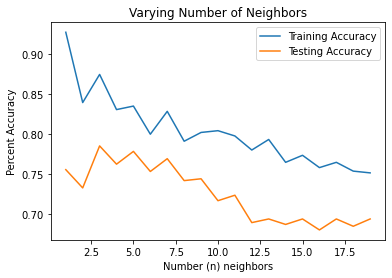

In [54]:
plt.title("Varying Number of Neighbors")
plt.plot(neighbors, train_n_value_accuracies.values(), label = "Training Accuracy")
plt.plot(neighbors, test_n_value_accuracies.values(), label = "Testing Accuracy")
plt.legend()
plt.xlabel("Number (n) neighbors")
plt.ylabel("Percent Accuracy")

Text(0, 0.5, 'Percent Accuracy')

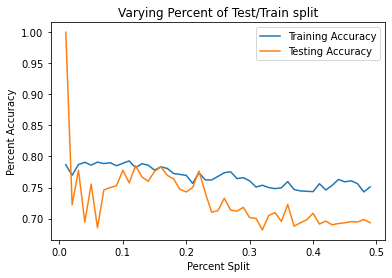

In [55]:
plt.title("Varying Percent of Test/Train split")
plt.plot(percents, train_test_percent_accuracies.values(), label = "Training Accuracy")
plt.plot(percents, test_test_percent_accuracies.values(), label = "Testing Accuracy")
plt.legend()
plt.xlabel("Percent Split")
plt.ylabel("Percent Accuracy")

In [56]:
X_train, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=26, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test1, y_test)
accuracy

0.7715736040609137

In [58]:
knn_predictions = knn.predict(X_test)

In [59]:
passid = test_df['PassengerId'].tolist()
submission_df = pd.DataFrame(list(zip(passid, knn_predictions)),
               columns =['PassengerId', 'Survived'])
# submission_df.to_csv('submission3.csv', index=False)

<h1 style="color:white; background-color:white; text-align:center; padding-top: 5px; padding-bottom: 5px; border: 2px solid #C4C4C3">
    <a href="#home" style="color:black;">Home</a>
</h1>